<a href="https://colab.research.google.com/github/rubathecoder/Ruba-AIML-Portfolio-/blob/main/Pizza_Place_Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
#loading main Pizza sales dataset
pizzas=pd.read_csv('/content/drive/My Drive/Pizza place sales/pizzas.csv')

In [5]:
#showing first fe rows to confirm
pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [6]:
#loading the additional dataset
pizza_types=pd.read_csv('/content/drive/My Drive/Pizza place sales/pizza_types.csv',encoding="latin1")
print(pizza_types)

   pizza_type_id                                        name category  \
0        bbq_ckn                  The Barbecue Chicken Pizza  Chicken   
1       cali_ckn                The California Chicken Pizza  Chicken   
2    ckn_alfredo                   The Chicken Alfredo Pizza  Chicken   
3      ckn_pesto                     The Chicken Pesto Pizza  Chicken   
4     southw_ckn                 The Southwest Chicken Pizza  Chicken   
5       thai_ckn                      The Thai Chicken Pizza  Chicken   
6       big_meat                          The Big Meat Pizza  Classic   
7    classic_dlx                    The Classic Deluxe Pizza  Classic   
8       hawaiian                          The Hawaiian Pizza  Classic   
9    ital_cpcllo                 The Italian Capocollo Pizza  Classic   
10    napolitana                        The Napolitana Pizza  Classic   
11   pep_msh_pep  The Pepperoni, Mushroom, and Peppers Pizza  Classic   
12     pepperoni                         The Pepper

In [7]:
pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


In [8]:
#merging the two datasets
merged_df=pizzas.merge(pizza_types,left_on='pizza_type_id',right_on='pizza_type_id')
merged_df.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."


now our datasets combine information from both the pizzas(prices,sizes) pizza_types(category,name,ingredients)

#Recommended Analysis
Pizza Place Sales A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas, served, with additional details on the type, size, quantity, price, and ingredients.
* How many customers do we have each day?
* Are there any peak hours?
* How many pizzas are typically in order?
*Do we have any bestsellers? How much money did we make this year?
* Can we identify any seasonality in the sales?
* Are there any pizzas we should take off the menu, or
* Any promotions we could leverage?





In [9]:
#top selling pizzas
bestsellers=merged_df['name'].value_counts().head(10)
print("Top 10 Bestselling Pizzas:")
print(bestsellers)

Top 10 Bestselling Pizzas:
name
The Greek Pizza                 5
The Barbecue Chicken Pizza      3
The Chicken Alfredo Pizza       3
The California Chicken Pizza    3
The Southwest Chicken Pizza     3
The Thai Chicken Pizza          3
The Big Meat Pizza              3
The Chicken Pesto Pizza         3
The Classic Deluxe Pizza        3
The Hawaiian Pizza              3
Name: count, dtype: int64


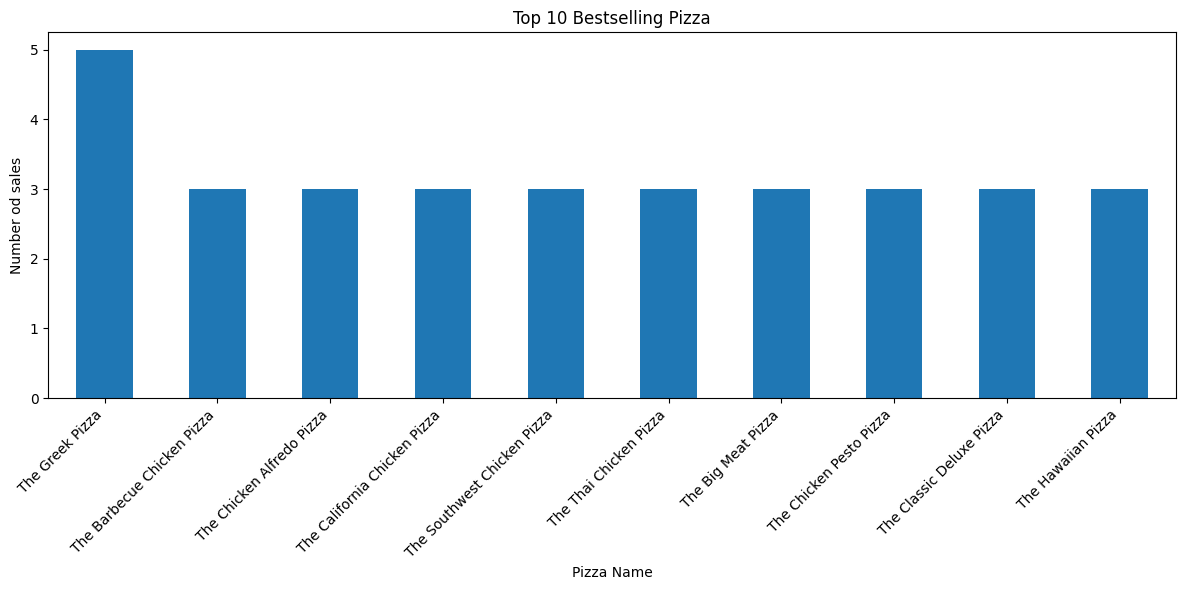

In [10]:
#Visualizing the bestsellers
plt.figure(figsize=(12,6))
bestsellers.plot(kind='bar')
plt.title('Top 10 Bestselling Pizza')
plt.xlabel('Pizza Name')
plt.ylabel('Number od sales')
plt.xticks(rotation=45,ha='right')
plt.tight_layout()
plt.show()

In [11]:
#How many customers do we have each day?
orders=pd.read_csv('/content/drive/My Drive/Pizza place sales/orders.csv')
orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [12]:
orders['date']=pd.to_datetime(orders['date'])
orders['hour']=pd.to_datetime(orders['time'],format='%H:%M:%S').dt.hour
#orders/customers per day
daily_orders=orders.groupby(orders['date'].dt.date).size()
print("Daily Orders:",daily_orders)



Daily Orders: date
2015-01-01    69
2015-01-02    67
2015-01-03    66
2015-01-04    52
2015-01-05    54
              ..
2015-12-27    35
2015-12-28    39
2015-12-29    27
2015-12-30    32
2015-12-31    73
Length: 358, dtype: int64


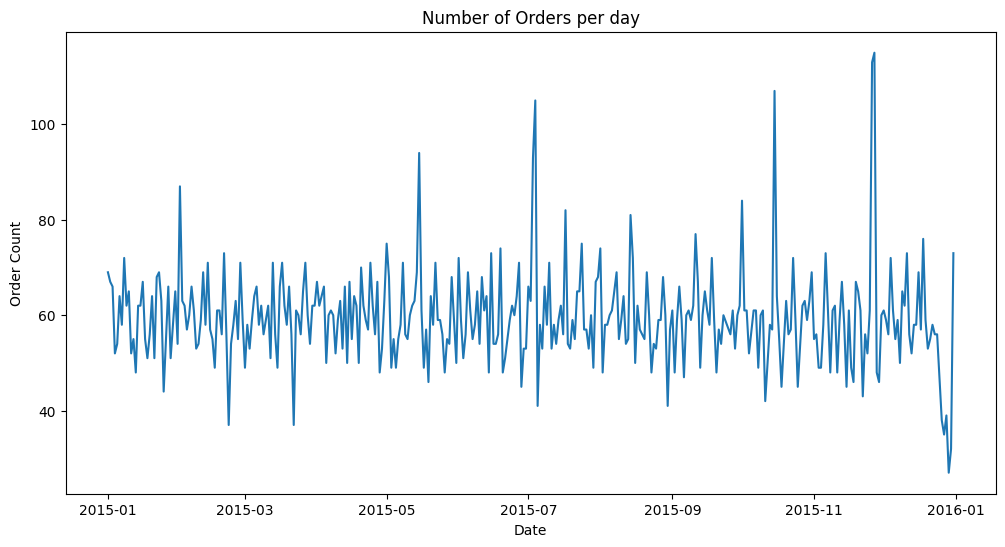

In [13]:
#plot for daily order trends
daily_orders.plot(figsize=(12,6))
plt.title('Number of Orders per day')
plt.xlabel('Date')
plt.ylabel('Order Count')
plt.show()

In [14]:
#peak hour analysis
hourly_orders=orders.groupby(orders['hour']).size()
print("Hourly Orders:",hourly_orders)

Hourly Orders: hour
9        1
10       8
11    1231
12    2520
13    2455
14    1472
15    1468
16    1920
17    2336
18    2399
19    2009
20    1642
21    1198
22     663
23      28
dtype: int64


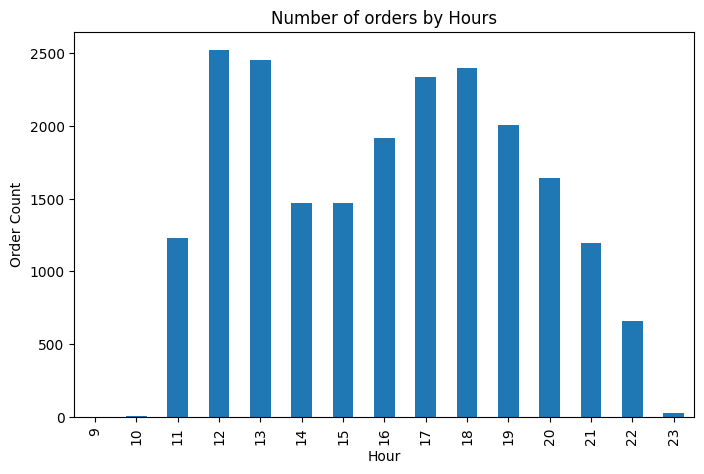

In [15]:
hourly_orders.plot(kind='bar',figsize=(8,5))
plt.title('Number of orders by Hours')
plt.xlabel('Hour')
plt.ylabel('Order Count')
plt.show()

In [16]:
#number of pizzas in typical order, loading order_details file
order_details=pd.read_csv('/content/drive/My Drive/Pizza place sales/order_details.csv')
pizzas_per_order=order_details.groupby('order_id')['quantity'].sum()
print("Pizzas per Order:",pizzas_per_order)

Pizzas per Order: order_id
1        1
2        5
3        2
4        1
5        1
        ..
21346    4
21347    4
21348    3
21349    1
21350    1
Name: quantity, Length: 21350, dtype: int64


In [17]:
#average pizza per order
average_pizzas=pizzas_per_order.mean()
print(f'Average number of pizzas per order:{average_pizzas:.2f}')

Average number of pizzas per order:2.32


In [18]:
#How much money did we make this year
#merging order_details data for full sales data
full_sales=order_details.merge(merged_df,left_on='pizza_id',right_on='pizza_id')
print(full_sales)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                     2         2  classic_dlx_m         1   classic_dlx    M   
2                     3         2  five_cheese_l         1   five_cheese    L   
3                     4         2    ital_supr_l         1     ital_supr    L   
4                     5         2     mexicana_m         1      mexicana    M   
...                 ...       ...            ...       ...           ...  ...   
48615             48616     21348  ckn_alfredo_m         1   ckn_alfredo    M   
48616             48617     21348  four_cheese_l         1   four_cheese    L   
48617             48618     21348   napolitana_s         1    napolitana    S   
48618             48619     21349     mexicana_l         1      mexicana    L   
48619             48620     21350      bbq_ckn_s         1       bbq_ckn    S   

       price               

In [19]:
#calculating revenue for each line item
full_sales['revenue']=full_sales['quantity']*full_sales['price']
print(full_sales)

       order_details_id  order_id       pizza_id  quantity pizza_type_id size  \
0                     1         1     hawaiian_m         1      hawaiian    M   
1                     2         2  classic_dlx_m         1   classic_dlx    M   
2                     3         2  five_cheese_l         1   five_cheese    L   
3                     4         2    ital_supr_l         1     ital_supr    L   
4                     5         2     mexicana_m         1      mexicana    M   
...                 ...       ...            ...       ...           ...  ...   
48615             48616     21348  ckn_alfredo_m         1   ckn_alfredo    M   
48616             48617     21348  four_cheese_l         1   four_cheese    L   
48617             48618     21348   napolitana_s         1    napolitana    S   
48618             48619     21349     mexicana_l         1      mexicana    L   
48619             48620     21350      bbq_ckn_s         1       bbq_ckn    S   

       price               

In [20]:
#total revenue for the year
total_revenue=full_sales['revenue'].sum()
print(f'Total Revenue for the year:${total_revenue:.2f}')

Total Revenue for the year:$817860.05


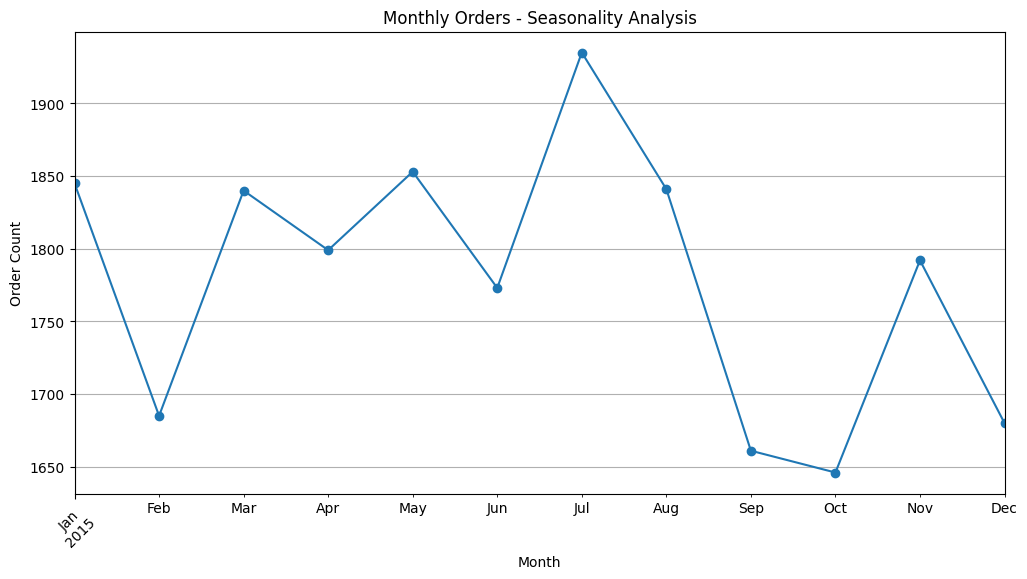

In [24]:
#Can we identify any seasonality in the sales
orders['date']=pd.to_datetime(orders['date'])
# Extract year and month for grouping
orders['year_month'] = orders['date'].dt.to_period('M')

# Group by year-month and count orders
monthly_orders = orders.groupby('year_month').size()

# Plot monthly orders for seasonality analysis
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
monthly_orders.plot(marker='o')
plt.title('Monthly Orders - Seasonality Analysis')
plt.xlabel('Month')
plt.ylabel('Order Count')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



In [25]:
#Are there any pizzas we should take off the menu
# Find least popular pizzas (lowest quantity sold)
least_popular = (
    full_sales.groupby('name')['quantity']
    .sum()
    .sort_values()
    .head(10)
)
print("Least Popular Pizzas (potential candidates for removal):")
print(least_popular)


Least Popular Pizzas (potential candidates for removal):
name
The Brie Carre Pizza            490
The Mediterranean Pizza         934
The Calabrese Pizza             937
The Spinach Supreme Pizza       950
The Soppressata Pizza           961
The Spinach Pesto Pizza         970
The Chicken Pesto Pizza         973
The Italian Vegetables Pizza    981
The Chicken Alfredo Pizza       987
The Green Garden Pizza          997
Name: quantity, dtype: int64


In [26]:
underperformers = (
    full_sales.groupby(['name', 'category', 'price'])['quantity']
    .sum()
    .sort_values()
    .head(10)
)
print("Underperforming Pizzas with Categories and Prices:")
print(underperformers)


Underperforming Pizzas with Categories and Prices:
name                          category  price
The Greek Pizza               Classic   35.95     28
The Green Garden Pizza        Veggie    20.25     95
The Chicken Alfredo Pizza     Chicken   12.75     96
The Calabrese Pizza           Supreme   12.25     99
The Mexicana Pizza            Veggie    12.00    162
The Chicken Alfredo Pizza     Chicken   20.75    188
The Italian Vegetables Pizza  Veggie    21.00    190
The Italian Supreme Pizza     Supreme   12.50    196
The Greek Pizza               Classic   20.50    255
The Spinach Supreme Pizza     Supreme   16.50    267
Name: quantity, dtype: int64


Identify pizzas with low sales but potentially wide margins or unique ingredients. Here’s a quick way to get candidates:

In [27]:
# Find 5 least popular pizzas (could use .head(10) if needed)
least_popular_names = (
    full_sales.groupby('name')['quantity'].sum()
    .sort_values()
    .head(5)
    .index
)

print("Suggest featuring these in combo or discount promotions:")
print(least_popular_names.tolist())


Suggest featuring these in combo or discount promotions:
['The Brie Carre Pizza', 'The Mediterranean Pizza', 'The Calabrese Pizza', 'The Spinach Supreme Pizza', 'The Soppressata Pizza']


#*Pizza Place Sales Analysis:* Yearly Insights & Solutions
**Overview**
 A year’s worth of transactional data was analyzed to uncover customer trends, order patterns, menu performance, and actionable business recommendations for a fictitious pizza restaurant. Data included sales, order timing, item quantities, pricing, and pizza categories.

**Key Insights**
*Customer & Order Trends*
Consistent Daily Traffic: The pizza place averaged 30–70 orders per day, with steady sales throughout the year and no drastic seasonal dips or abrupt spikes. This suggests a loyal customer base and stable demand.

**Peak Hours:** The busiest periods are lunchtime (12:00–14:00) and early evening (17:00–19:00), representing opportunities for lunch specials and dinner combo promotions.

**Menu Performance**
**Bestsellers:** "The Greek Pizza" is the top performer, selling significantly more than other pizzas. Other consistent favorites include "The Barbecue Chicken Pizza" and "The Chicken Alfredo Pizza."

**Quantity per Order:** The average order included 2.32 pizzas, indicating frequent group or family purchases.

**Revenue:** Annual sales totaled $817,860.05, confirming the value of a well-rounded menu.

**Underperformers & Menu Optimization**
Least Popular Pizzas: Items such as The Brie Carre Pizza, The Mediterranean Pizza, and The Calabrese Pizza saw the lowest sales. These are strong candidates for special promotions, recipe refinement, or potential menu removal if consistently unprofitable.

**Solutions & Actionable Recommendations**
1. Promotions to Boost Weak Sellers
Combo Deals: Pair underperformers (e.g., The Brie Carre Pizza) with bestsellers (e.g., The Greek Pizza) at a special price to drive trial and cross-sell.

Limited-Time Offers: Feature the least popular pizzas as “Pizza of the Week” or in themed events (“Veggie Festival”) to increase their visibility and sales.

2. Leverage Peak Demand
Happy Hour Deals: Run price promotions during 12–14h or 17–19h to further boost sales during already busy hours, and upsell side items or desserts.

Family Combos: Since the average order size is over two pizzas, create bundle meals or family packs targeting groups.

3. Menu Engineering
Menu Review: Monitor sales and cost data for the lowest-selling pizzas; if targeted promotions do not improve performance, consider removing them or replacing them with new recipes based on customer feedback.

**Highlight Top Pizzas:** Use prime menu space, staff recommendations, or digital marketing to showcase bestsellers.

4. Continuous Monitoring
Routinely analyze sales by time (daily, weekly, monthly) and adjust promotions for slow seasons or off-peak hours to ensure consistent business growth.

**Next Steps**
Implement targeted promotions for underperformers and monitor their impact.

Schedule periodic reviews of menu performance and customer feedback.

Explore additional data (customer demographics, feedback, digital sales) for deeper personalization and marketing optimization.
Promotions You Could Leverage
1. Combo/Discount Promotions for Underperformers
Feature Least Popular Pizzas in Promotions:

The Brie Carre Pizza

The Mediterranean Pizza

The Calabrese Pizza

The Spinach Supreme Pizza

The Soppressata Pizza

Run targeted discounts, "Try Something New" deals, or include these in bundled meals. This can help boost sales for pizzas that are currently not favored by customers.

2. Bundling with Bestsellers
Pair an underperforming pizza with a top seller (like The Greek Pizza or The Barbecue Chicken Pizza) in a combo meal, offering a price incentive to increase trials and cross-sell.

3. Price or Size Promotions
If certain sizes or higher-priced options aren’t selling, offer a “large upgrade” at the price of a medium for pizzas low in sales.

Provide limited-time offers (e.g., "Gourmet Weekend" for specialty pizzas such as The Brie Carre Pizza).

4. Themed or Ingredient-Based Marketing
Promote ingredients/specialty pizzas that are unique (like The Greek Pizza with feta and olives, or the Brie Carre with brie cheese) to set them apart from standard flavors.

5. Seasonality or Event-Based Deals
If you have months with lower sales, run time-limited promotions (e.g., "Spring Veggie Festival" or “Winter Meat Lovers Specials”) focusing on pizzas that need more exposure.

6. Loyalty and Reward Programs
Offer reward points or a small free pizza from the underperformer list after a certain number of purchases, incentivizing repeat visits and trying new menu items.

Specific Example Promos (based on your findings):
Combo Example: “Order The Greek Pizza and get The Brie Carre Pizza 50% off!”

Flash Sale: “Veggie Pizza of the Week — The Mediterranean Pizza at just $10!”

Weekend Special: “Any Supreme Pizza + Any Classic Pizza for $25!”

By leveraging promotions on least popular items, you can:

Increase overall sales volume.

Reduce ingredient waste for slow-moving items.

Gain data to decide if these pizzas can become hits with better visibility, or if they’re candidates for permanent menu removal.